### Dependencies and Setup

## Tumor Response to Treatment

In [1]:
# Import 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse = pd.read_csv(mouse_drug_data_to_load)
df_clinical = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combo_table = pd.merge(df_mouse, df_clinical,left_on="Mouse ID", right_on="Mouse ID")

# Display the data table for preview
combo_table.head(5)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


### Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Tumor_Gp = combo_table.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
Tumor_Gp_Avg = Tumor_Gp.mean()
 
# Display a sample of the data
Tumor_Gp_Avg_df = pd.DataFrame(Tumor_Gp_Avg)
Tumor_Gp_Avg_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Tumor_std_err = Tumor_Gp.sem()
# Convert to DataFrame
Tumor_std_err_df = pd.DataFrame(Tumor_std_err)
# Preview DataFrame
Tumor_std_err_df.head() 

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
 # Minor Data Munging to Re-Format the Data Frames
Tumor_Gp_Avg_df_NoInd = Tumor_Gp_Avg_df.reset_index()
Pivot_Tumor_Gp_Avg = Tumor_Gp_Avg_df_NoInd.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
 
# Preview that Reformatting worked
Pivot_Tumor_Gp_Avg.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
Tumor_std_err_df_NoInd = Tumor_std_err_df.reset_index()

Pivot_Tumor_std_err = Tumor_std_err_df_NoInd.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)') 
Pivot_Tumor_std_err.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [6]:
Pivot_Tumor_Gp_Avg.drop(['Ceftamin', 'Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis=1, inplace=True)
Pivot_Tumor_std_err.drop(['Ceftamin', 'Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis=1, inplace=True)

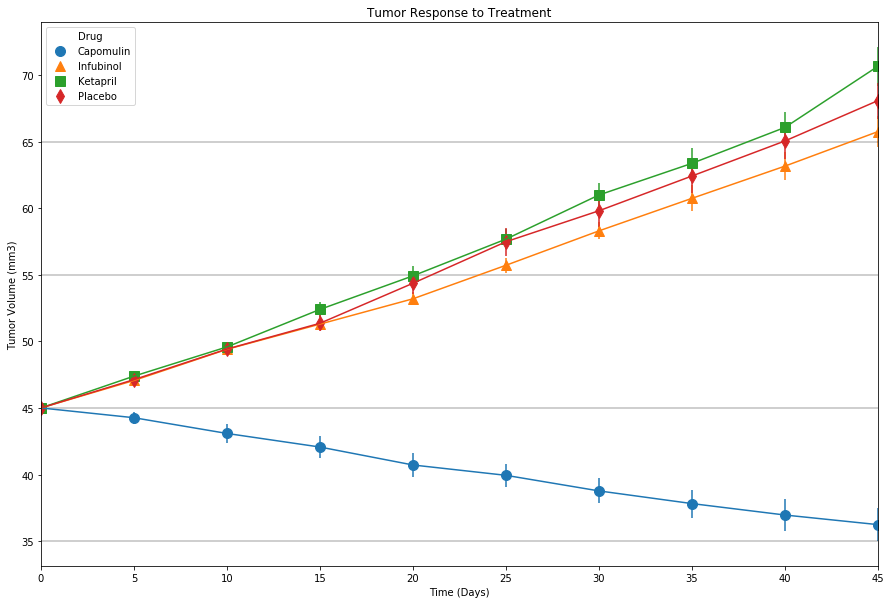

In [7]:
outplot = Pivot_Tumor_Gp_Avg.plot(figsize=(15,10), yerr = Pivot_Tumor_std_err, legend = False)

#reset color cycle so that the marker colors match
outplot.set_prop_cycle(None)

#plot the markers
Pivot_Tumor_Gp_Avg.plot(figsize=(15,10), style=['o','^','s','d'], markersize=10, ax = outplot)

#plot descriptions
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

for pline in range(35,75,10) :
    plt.hlines(pline, 0, 50, alpha=0.25)

# Save the Figure
plt.savefig(os.path.join('Images','Tumor_Response_To_Treatment.png'))    
 
plt.show()

### Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Combo_Table_Gp = combo_table.groupby(['Drug','Timepoint'])['Metastatic Sites']

# Now get the Avg                
Combo_Table_Gp_Avg = Combo_Table_Gp.mean()
# Convert to DataFrame
Combo_Table_Gp_Avg_df = pd.DataFrame(Combo_Table_Gp_Avg)
# Preview DataFrame
Combo_Table_Gp_Avg_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Combo_Table_Gp_Std_Err = Combo_Table_Gp.sem()

# Convert to DataFrame
Combo_Table_Gp_Std_Err_df = pd.DataFrame(Combo_Table_Gp_Std_Err)

# Preview DataFrame
Combo_Table_Gp_Std_Err_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
Combo_Table_Gp_Avg_df_NoInd = Combo_Table_Gp_Avg_df.reset_index()
Combo_Table_Gp_Std_Err_df_NoInd = Combo_Table_Gp_Std_Err_df.reset_index()

pivot_Combo_Table_Gp_Avg_df = Combo_Table_Gp_Avg_df_NoInd.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
pivot_Combo_Table_Gp_Std_Err_df = Combo_Table_Gp_Std_Err_df_NoInd.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
 



In [11]:
# Preview that Reformatting worked
pivot_Combo_Table_Gp_Avg_df.drop(['Ceftamin', 'Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis=1, inplace=True)
pivot_Combo_Table_Gp_Avg_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [12]:
# Preview that Reformatting worked
pivot_Combo_Table_Gp_Std_Err_df.drop(['Ceftamin', 'Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis=1, inplace=True)
pivot_Combo_Table_Gp_Std_Err_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


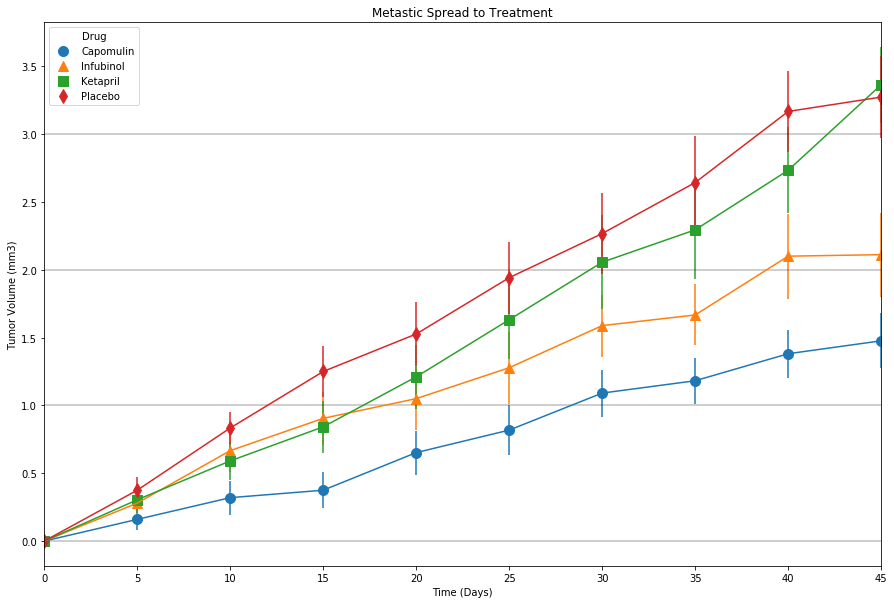

In [13]:
outplot_2 = pivot_Combo_Table_Gp_Avg_df.plot(figsize=(15,10), yerr = pivot_Combo_Table_Gp_Std_Err_df, legend = False)

#reset color cycle so that the marker colors match
outplot_2.set_prop_cycle(None)

#plot the markers
pivot_Combo_Table_Gp_Avg_df.plot(figsize=(15,10), style=['o','^','s','d'], markersize=10, ax = outplot_2)

#plot descriptions
plt.title('Metastic Spread to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')


for pline in range(0,4,1) :
    plt.hlines(pline, 0, 50, alpha=0.25)
    
# Save the Figure
plt.savefig(os.path.join('Images','Metastic_Spread_During_Treatment.png'))    
 
plt.show()

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint
combo_table_mouse_gp = combo_table.groupby(["Drug","Timepoint"]).count()

# Calculate Survival Rate
combo_table_mouse_gp["Survival Rate"] = combo_table_mouse_gp["Mouse ID"]/25*100

# Drop extra columns
combo_table_mouse_gp_small = combo_table_mouse_gp.drop(['Metastatic Sites', 'Tumor Volume (mm3)','Mouse ID'], axis=1)
combo_table_mgs = combo_table_mouse_gp_small.reset_index("Drug")

# Pivot table to show drus and their survival rates over time
Pivot_Combo_mgs_temp = combo_table_mgs.pivot(columns='Drug', values='Survival Rate')
Pivot_Combo_mgs = Pivot_Combo_mgs_temp.drop(['Ceftamin', 'Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis=1)

# Preview DataFrame
Pivot_Combo_mgs.head()


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


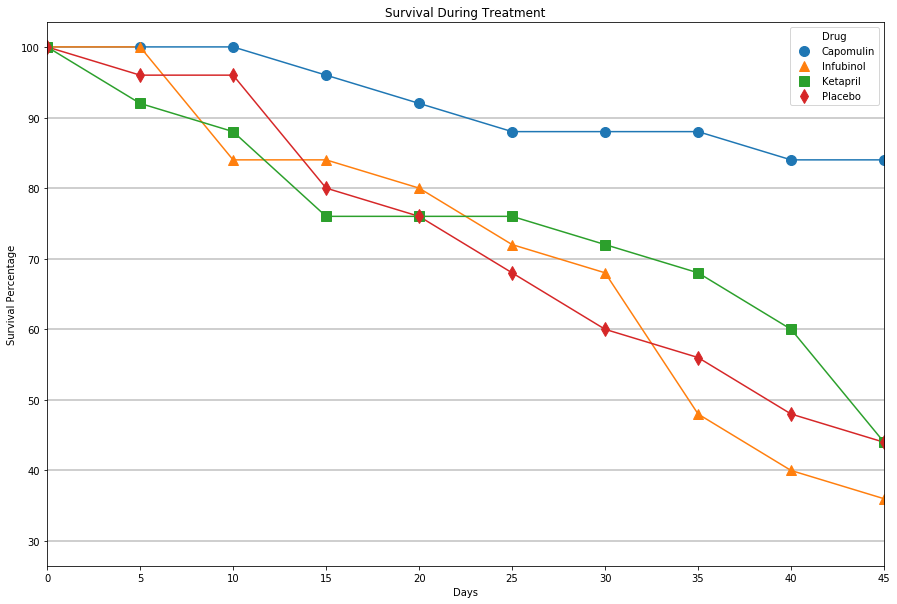

In [15]:
outplot_3 = Pivot_Combo_mgs.plot(figsize=(20,36), legend = False)

#reset color cycle so that the marker colors match
outplot_3.set_prop_cycle(None)

#plot the markers
Pivot_Combo_mgs.plot(figsize=(15,10), style=['o','^','s','d'], markersize=10, ax = outplot_3)
  
for pline in range(30,100,10) :
    plt.hlines(pline, 0, 50, alpha=0.25)
    
#plot descriptions
plt.title('Survival During Treatment')
plt.xlabel('Days')
plt.ylabel('Survival Percentage')

    
# Save the Figure
plt.savefig(os.path.join('Images','Survival_During_treatment.png'))    

    
plt.show()

### Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug

percentage_change = (Pivot_Tumor_Gp_Avg.iloc[-1]/(Pivot_Tumor_Gp_Avg.iloc[0])-1)*100

# Display the data to confirm
percentage_change


Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

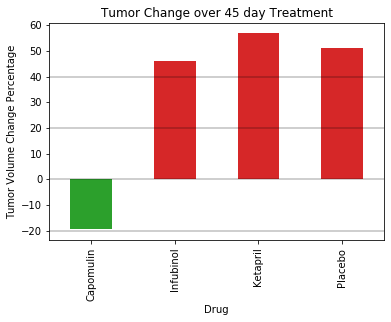

In [17]:
# Create a box plot to display the percentage changed for 4 of the drugs

drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']

for pline in range(-20,60,20) :
    plt.hlines(pline, -10, 50, alpha=0.25)

#plot descriptions
plt.title('Tumor Change over 45 day Treatment')
plt.xlabel('Days')
plt.ylabel('Tumor Volume Change Percentage')

# Choose a color for each bar
percentage_change.plot.bar(color=['C2', 'C3','C3','C3'])

plt.savefig(os.path.join('Images','tumor_change.png'))